# Credit EDA Case Study 

This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

 

In [1]:
#import the warnings.

import warnings
warnings.filterwarnings('ignore')

In [2]:
#import the useful libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns',1000)
pd.set_option('display.max_info_columns',122)

In [3]:
#read the data set of "application_data" in application_df.
application_df=pd.read_csv("./application_data.csv")

In [4]:
application_df.shape

(307511, 122)

In [5]:
application_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [6]:
application_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [7]:
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nu

In [8]:
application_df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

### DATA QUALITY CHECK AND MISSING VALUES

### Data Cleaning 

#### Inspecting the null values ie., finding the percentage of missing data in the application dataframe .

In [9]:
application_df.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [10]:
# finding the percentage of missing data in the application dataframe 
missing_data_col=(application_df.isnull().sum()/len(application_df.index))*100
missing_data_col

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 122, dtype: float64

In [11]:
# finding those columns which have more than and equal to 30% missing values

missing_data_col=missing_data_col[missing_data_col.values>=30]
missing_data_col.count()

50

So there are 50 columns who have missing values more than 30% , so we remove these 50 columns from our application_df dataframe.

In [12]:
# Removing those 41 columns from our application_df dataframe.
list_empty_cols=list(missing_data_col[missing_data_col.values>=30].index) 
# len(list_empty_cols)
application_df.drop(labels=list_empty_cols,axis=1,inplace=True)

application_df.shape

(307511, 72)

In [13]:
#Checking for null percentage in columns again

(application_df.isnull().sum()/len(application_df.index))*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 72, dtype: float64

There are columns some columns with missing values around 13% . But these columns are not necessary for our analysis , therefore we are going to remove these columns alongwith some other unnecessary columns.

In [14]:
# Removing unnecessary columns from this dataset

cols_not_req =['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR','EXT_SOURCE_2','EXT_SOURCE_3','FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE','FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL','CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION']

application_df.drop(labels=cols_not_req,axis=1,inplace=True)

In [15]:
application_df.shape

(307511, 28)

In [16]:
#Checking for the null values percentage in the columns again
(application_df.isnull().sum()/len(application_df.index))*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.003902
AMT_GOODS_PRICE                0.090403
NAME_TYPE_SUITE                0.420148
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
WEEKDAY_APPR_PROCESS_START     0.000000
HOUR_APPR_PROCESS_START        0.000000
LIVE_REGION_NOT_WORK_REGION    0.000000
REG_CITY_NOT_LIVE_CITY         0.000000


### Reporting on how to handle the missing values

Now also some columns are present with very less missing values namely:<br>
AMT_ANNUITY               -         0.003902
<br>AMT_GOODS_PRICE       -         0.090403
<br>NAME_TYPE_SUITE       -         0.420148

We will analyse these columns and report the best metric that can be used to impute a missing value in these columns.

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

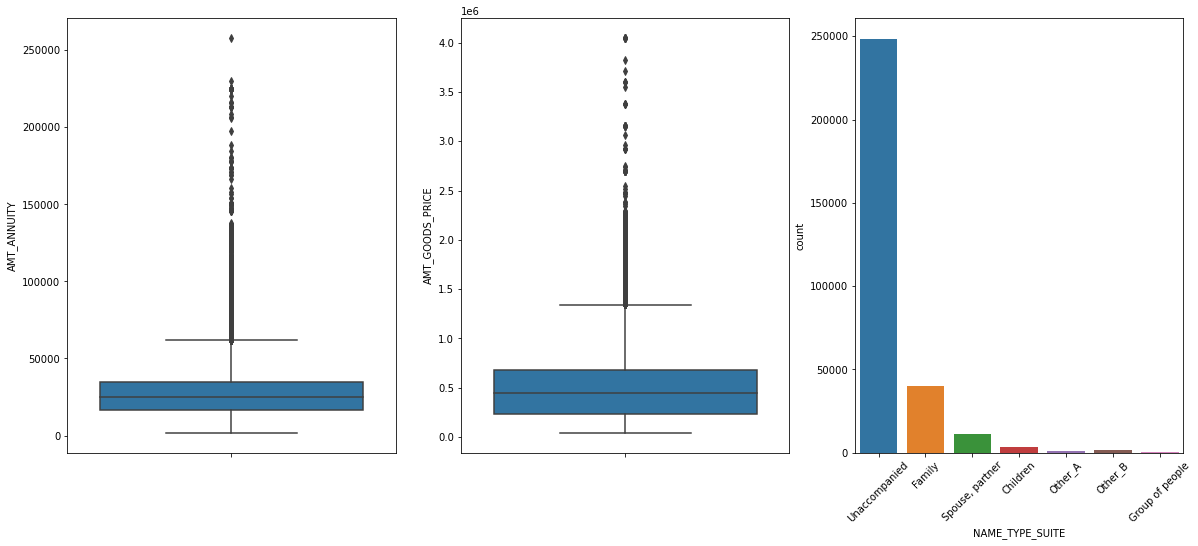

In [17]:
# Drawing the subplots in order to analyse all the above three columns missing values percentages:

plt.figure(figsize=(20,8))

#Plotting a boxplot for "AMT_ANNUITY" column to find out if outliers are present.
plt.subplot(1,3,1)
sns.boxplot(y=application_df["AMT_ANNUITY"])

#Plotting a boxplot for "AMT_GOODS_PRICE" column to find out if outliers are present.
plt.subplot(1,3,2)
sns.boxplot(y=application_df["AMT_GOODS_PRICE"])

#Plotting a countplot for "NAME_TYPE_SUITE" which is a categorical column ,for finding out which category in this column which has the most number of counts.
plt.subplot(1,3,3)
sns.countplot(x="NAME_TYPE_SUITE",data=application_df)
plt.xticks(rotation=45)


#### 1) Analysing the AMT_ANNUITY column

From the above subplot 1 ,  we see that this column has outliers so we cannot fill the missing values with mean . Hence when outliers are present , then the best metric to fill these missing values would be Median value because median is not affected by outliers .  So next we find the median for this column.

In [18]:
application_df["AMT_ANNUITY"].median()

24903.0

So we can impute the missing values in the "AMT_ANNUITY" column with the median value which is 24903.

#### 2) Analysing the AMT_GOODS_PRICE

From the above subplot 2 , we see that this column has outliers so we cannot fill the missing values with mean . Hence when outliers are present , then the best metric to fill these missing values would be Median value because  median is not affected by outliers .  So next we find the median for this column.

In [19]:
application_df["AMT_GOODS_PRICE"].median()

450000.0

#### 3) Analysing the NAME_TYPE_SUITE

Since this is a categorical column , from the above plotted subplot 3 , we can see that the category ="Unaccompanied" is having the most number of counts , therefore it will suitable to impute the missing values in this column by the category "Unaccompanied"  since it is the Mode value and imputing with this , it won't affect our analysis. 

### Analysing the datatypes and values of the columns:

In [20]:
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 28 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [21]:
#Checking the values in  the following columns : "DAYS_BIRTH",'DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH'

application_df[["DAYS_BIRTH",'DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']]

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
0,-9461,-637,-3648.0,-2120
1,-16765,-1188,-1186.0,-291
2,-19046,-225,-4260.0,-2531
3,-19005,-3039,-9833.0,-2437
4,-19932,-3038,-4311.0,-3458
...,...,...,...,...
307506,-9327,-236,-8456.0,-1982
307507,-20775,365243,-4388.0,-4090
307508,-14966,-7921,-6737.0,-5150
307509,-11961,-4786,-2562.0,-931


From above we see that there are negative values in the columns: "DAYS_BIRTH",'DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH'

So we need to convert the negative values in the columns into positive values because these columns should not contain negative values. 

In [22]:
# Converting the negative values in the columns into positive values:

application_df['DAYS_BIRTH'] = application_df['DAYS_BIRTH'].abs()
application_df['DAYS_EMPLOYED'] = application_df['DAYS_EMPLOYED'].abs()
application_df['DAYS_REGISTRATION'] = application_df['DAYS_REGISTRATION'].abs()
application_df['DAYS_ID_PUBLISH'] = application_df['DAYS_ID_PUBLISH'].abs()


In [23]:
application_df[["DAYS_BIRTH",'DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']]

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
0,9461,637,3648.0,2120
1,16765,1188,1186.0,291
2,19046,225,4260.0,2531
3,19005,3039,9833.0,2437
4,19932,3038,4311.0,3458
...,...,...,...,...
307506,9327,236,8456.0,1982
307507,20775,365243,4388.0,4090
307508,14966,7921,6737.0,5150
307509,11961,4786,2562.0,931


Since the columns "HOUR_APPR_PROCESS_START" have the datatype as int64 ,we can convert the datatype of this columns into pandas datetime format .

In [24]:
application_df['HOUR_APPR_PROCESS_START'] =  pd.to_datetime(application_df['HOUR_APPR_PROCESS_START']) 

### Analysing some categorical columns:

In [25]:
application_df['CODE_GENDER'].value_counts()         

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

Since this column contains XNA values , we can replace these 4 columns with XNA values with the MODE value ie., Gender ='F' , as it won't make affect our dataset.

In [26]:
# Updating 'CODE_GENDER' column with "F" 

application_df.loc[application_df['CODE_GENDER']=='XNA','CODE_GENDER']='F'
application_df['CODE_GENDER'].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [27]:
application_df['ORGANIZATION_TYPE'].value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [28]:
application_df['ORGANIZATION_TYPE'].describe()

count                     307511
unique                        58
top       Business Entity Type 3
freq                       67992
Name: ORGANIZATION_TYPE, dtype: object

For column 'ORGANIZATION_TYPE', we have total 307511 rows of which 55374 rows are having 'XNA' values , which is equal to 18% which means that 18% of the column is having this 'XNA' values. So we can drop these 55374 rows, as dropping 18%(very less) rows will not affect our dataset.

In [29]:
# dropping 55374 rows which have 'XNA' values in the ORGANIZATION_TYPE column

application_df=application_df.drop(application_df.loc[application_df['ORGANIZATION_TYPE']=='XNA'].index)
application_df[application_df['ORGANIZATION_TYPE']=='XNA'].shape

(0, 28)

So rows with XNA values are removed from the column  ORGANIZATION_TYPE 

In [30]:
# Converting all the numeric columns into numeric so that all the columns are converted into their correct datatypes.

numeric_cols=['TARGET','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','REGION_POPULATION_RELATIVE','DAYS_BIRTH',
                'DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','HOUR_APPR_PROCESS_START','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']

application_df[numeric_cols]=application_df[numeric_cols].apply(pd.to_numeric)
application_df.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,WEDNESDAY,10,0,0,0,0,Business Entity Type 3
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,MONDAY,11,0,0,0,0,School
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,MONDAY,9,0,0,0,0,Government
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,WEDNESDAY,17,0,0,0,0,Business Entity Type 3
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,THURSDAY,11,0,0,1,1,Religion


#### Handling Continuous variables

So we have Continuous variables : AMT_CREDIT and AMT_INCOME_TOTAL.<br>
We can use binning for these continuous variables and diving them into slots 

In [31]:
# Making bins for AMT_CREDIT amount

bins = [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,1000000000]
slots = ['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000',
        '450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000',
        '800000-850000','850000-900000','900000 and above']

application_df['RANGE_AMT_CREDIT']=pd.cut(application_df['AMT_CREDIT'],bins=bins,labels=slots)

In [32]:
# Making bins for AMT_INCOME_TOTAL amount

bins = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]
slot = ['0-25000', '25000-50000','50000-75000','75000,100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
       '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
       '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']

application_df['RANGE_AMT_INCOME']=pd.cut(application_df['AMT_INCOME_TOTAL'],bins,labels=slot)

In [33]:
application_df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,RANGE_AMT_CREDIT,RANGE_AMT_INCOME
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,WEDNESDAY,10,0,0,0,0,Business Entity Type 3,400000-450000,200000-225000
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,MONDAY,11,0,0,0,0,School,900000 and above,250000-275000
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,MONDAY,9,0,0,0,0,Government,0-150000,50000-75000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,WEDNESDAY,17,0,0,0,0,Business Entity Type 3,300000-350000,125000-150000
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,THURSDAY,11,0,0,1,1,Religion,500000-550000,100000-125000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307504,456248,0,Cash loans,F,N,Y,0,153000.0,331920.0,16096.5,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,House / apartment,0.022625,16705,7258,9798.0,259,WEDNESDAY,11,0,0,0,0,Self-employed,300000-350000,150000-175000
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,0.032561,9327,236,8456.0,1982,THURSDAY,15,0,0,0,0,Services,250000-300000,150000-175000
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,Unaccompanied,Working,Higher education,Separated,House / apartment,0.005002,14966,7921,6737.0,5150,THURSDAY,9,0,0,1,1,School,650000-700000,150000-175000
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,319500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.005313,11961,4786,2562.0,931,WEDNESDAY,9,0,1,1,0,Business Entity Type 1,350000-400000,150000-175000


### Dividing the dataset into two datasets:

### target=1(client with payment difficulties) and target=0(all other)



In [34]:
df_target_0=application_df.loc[application_df["TARGET"]==0]
df_target_1=application_df.loc[application_df["TARGET"]==1]

In [35]:
df_target_0.shape

(230302, 30)

In [36]:
df_target_1.shape

(21835, 30)

In [37]:
# Percentage of rows for target 0
round(len(df_target_0)/(len(df_target_1)+len(df_target_0)),2)*100

91.0

In [38]:
# Percentage of rows for target 1
round(len(df_target_1)/(len(df_target_1)+len(df_target_0)),2)*100

9.0

In [39]:
# Calculating Imbalance percentage
round(len(df_target_0)/len(df_target_1),2)

10.55

#### IMBALANCE RATIO = 10.55 


### UNIVARIATE ANALYSIS for Categorical Variables

#### Univariate analysis for TARGET=0

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text major ticklabel objects>)

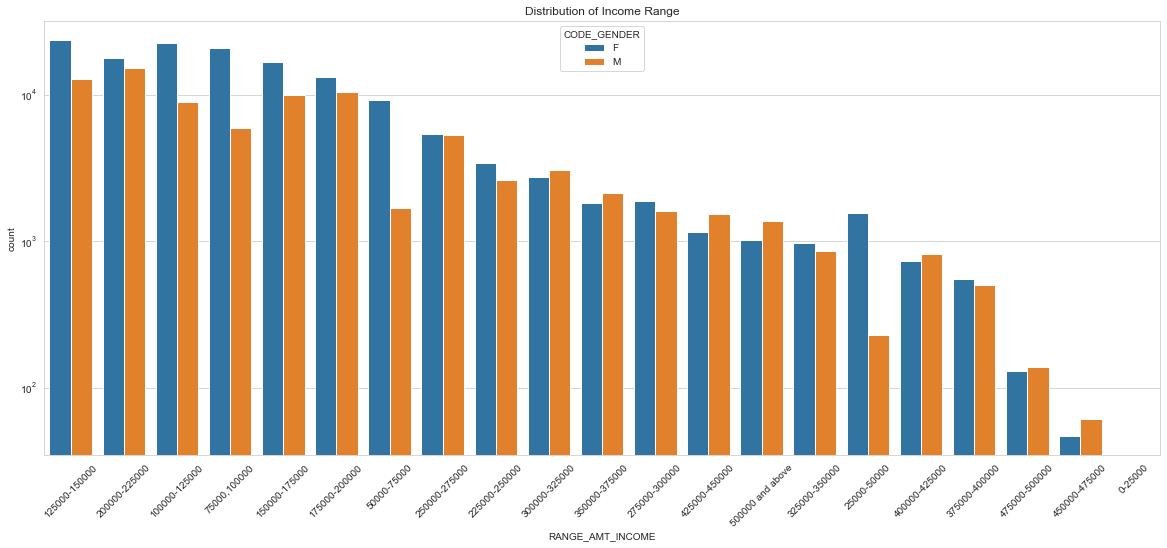

In [40]:
# PLotting for income range
plt.figure(figsize=(20,8))
sns.set_style('whitegrid')
plt.title("Distribution of Income Range")
sns.countplot(x="RANGE_AMT_INCOME",data=df_target_0,hue='CODE_GENDER',order=df_target_0['RANGE_AMT_INCOME'].value_counts().index)
plt.yscale('log')
plt.xticks(rotation=45)

### Inferences from the graph:
1) Female counts are greater than male counts for most of the income ranges.<br>
2) Income range from 100000 to 225000  is having more number of credits.<br>
3) From the graph we can infer that majority of the females have higher credits than the males for      the respective ranges.<br>
4) No income count for income range less than 25000 .<br>
5) Less count for income range 40000 and below.

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

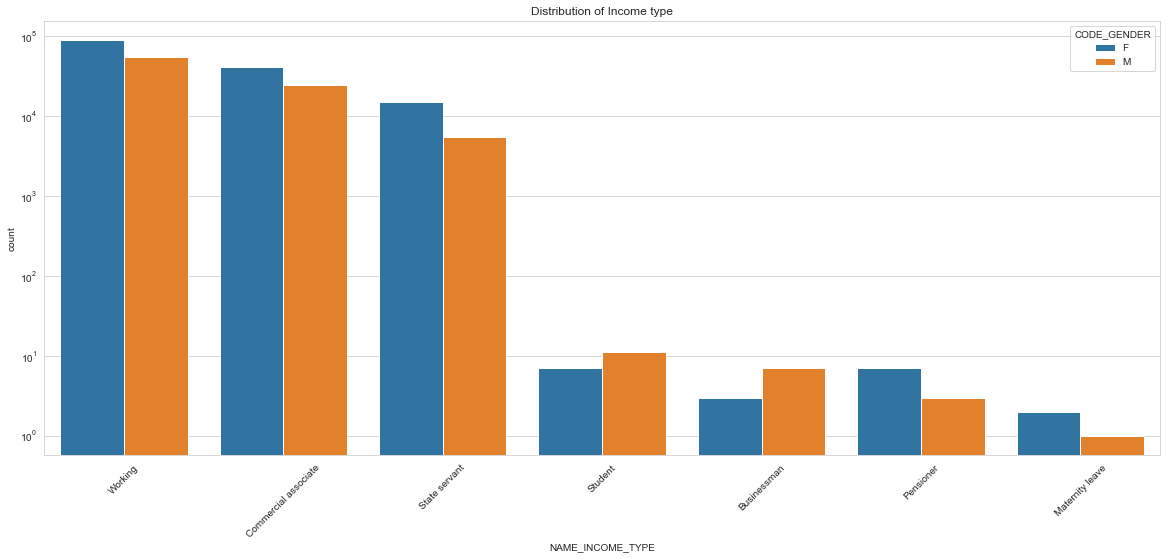

In [41]:
# Plotting for Income type
sns.set_style('whitegrid')
plt.figure(figsize=(20,8))
plt.title("Distribution of Income type")
sns.countplot(x="NAME_INCOME_TYPE",data=df_target_0,hue='CODE_GENDER',order=df_target_0['NAME_INCOME_TYPE'].value_counts().index)
plt.yscale('log')
plt.xticks(rotation=45)

#### Inferences from  the above graph:

1) For income type ‘State Servant’,‘working’ and 'commercial associate'  the number of credits are higher than others.<br>
2) For income type ‘State Servant’,‘working’, 'commercial associate','Pensioner' and 'Maternity Leave' , Females are having more number of credits than males.<br>
3) Less number of credits for income type ‘student’ ,’pensioner’, ‘Businessman’ and ‘Maternity leave’.

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

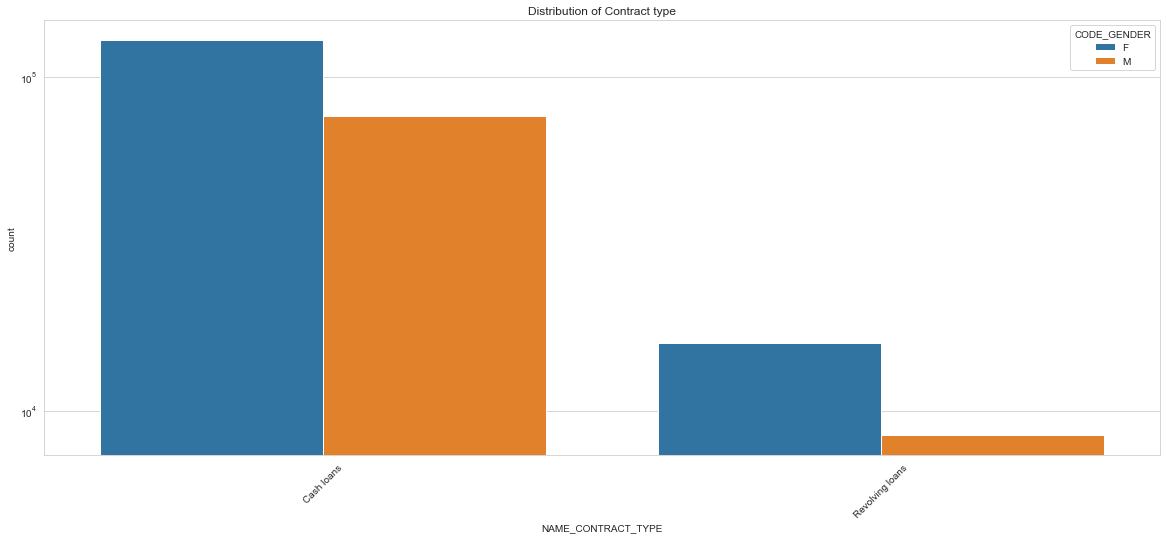

In [42]:
# Plotting for Contract type
plt.figure(figsize=(20,8))
sns.set_style('whitegrid')
plt.title("Distribution of Contract type")
sns.countplot(x="NAME_CONTRACT_TYPE",data=df_target_0,hue='CODE_GENDER',order=df_target_0['NAME_CONTRACT_TYPE'].value_counts().index)
plt.yscale('log')
plt.xticks(rotation=45)

#### Inferences from the above graph:

1) For contract type ‘cash loans’ is having higher number of credits than ‘Revolving loans’ contract type.<br>
2) Number of Females applying for credits is more than males.


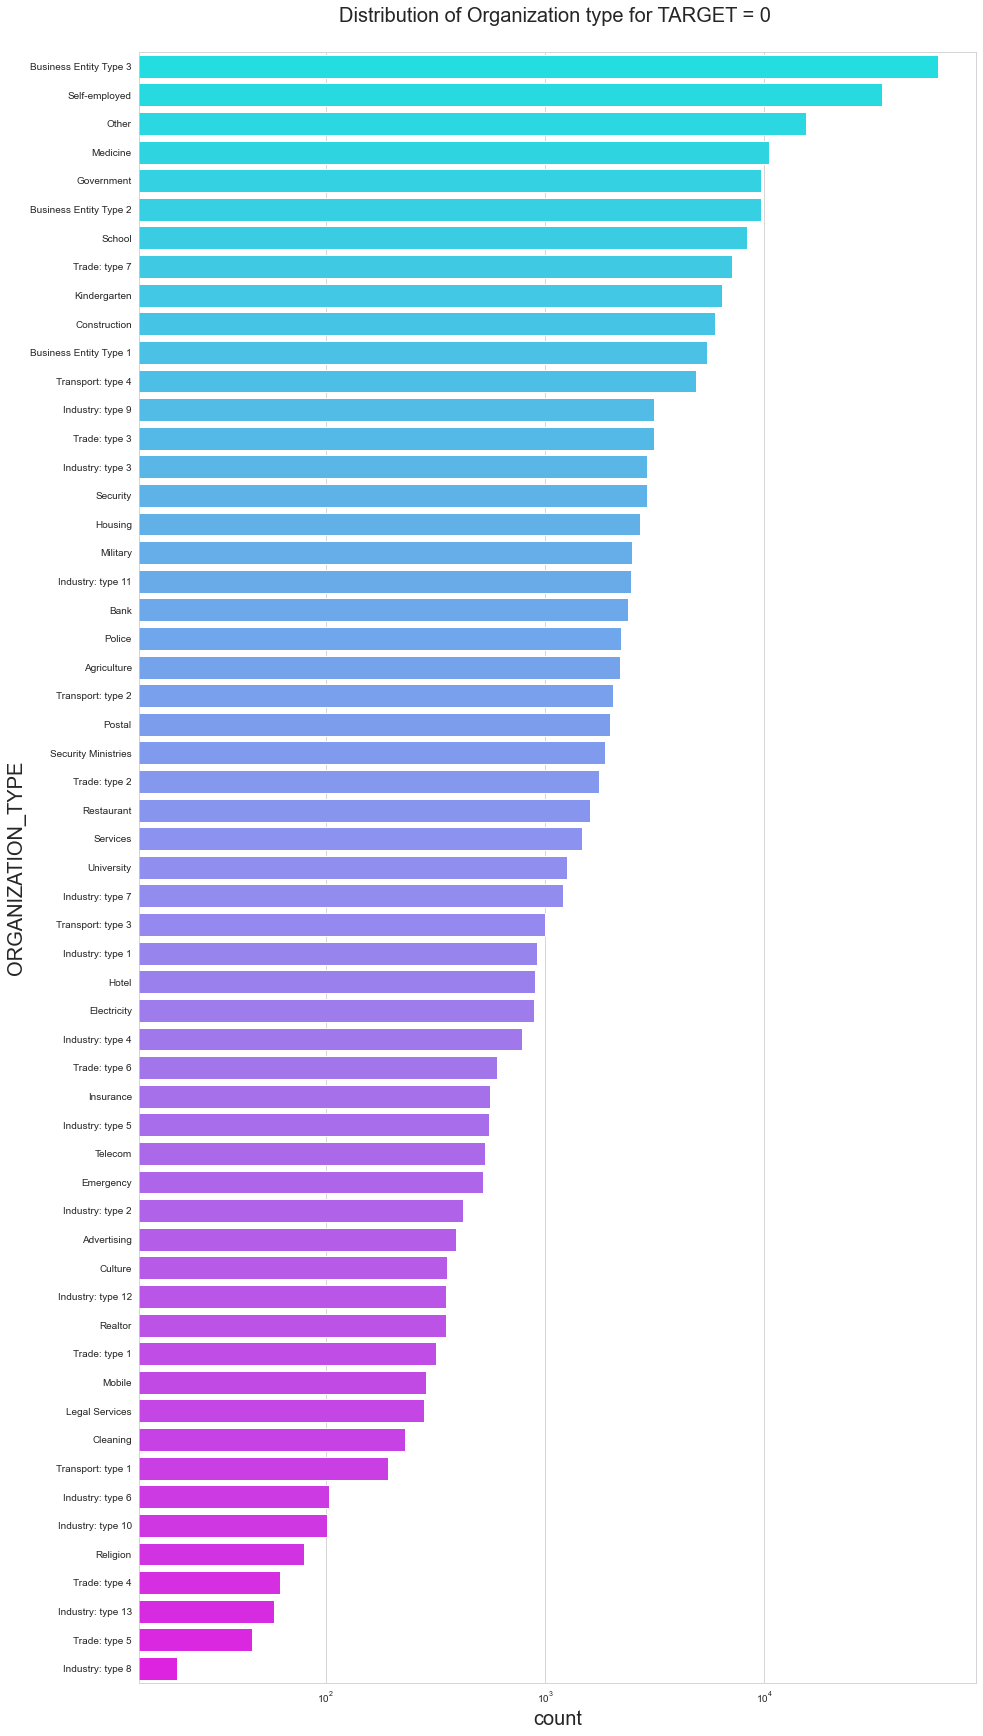

In [43]:
# Plotting for Organization type 
plt.figure(figsize=(15,30))
sns.set_style('whitegrid')
plt.rcParams['axes.titlepad'] = 30
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 20
plt.title("Distribution of Organization type for TARGET = 0 ")
sns.countplot(y="ORGANIZATION_TYPE",data=df_target_0,order=df_target_0['ORGANIZATION_TYPE'].value_counts().index,palette='cool')
plt.xscale('log')

# plt.xticks(rotation=45)


#### Inferences from the above graph.

1)Clients which have applied for credits are mosty from the organization type ‘Business entity Type 3’ , ‘Self employed’ , ‘Other’ , ‘Medicine’, ‘Government’ and ‘Business Entity Type 2’.
<br>
2)Less clients have applied for credits from Industry type 8,type 13 , type 10, type 6, religion and  trade type 5, type 4.


#### Univariate analysis for TARGET=1 (client with payment difficulties)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text major ticklabel objects>)

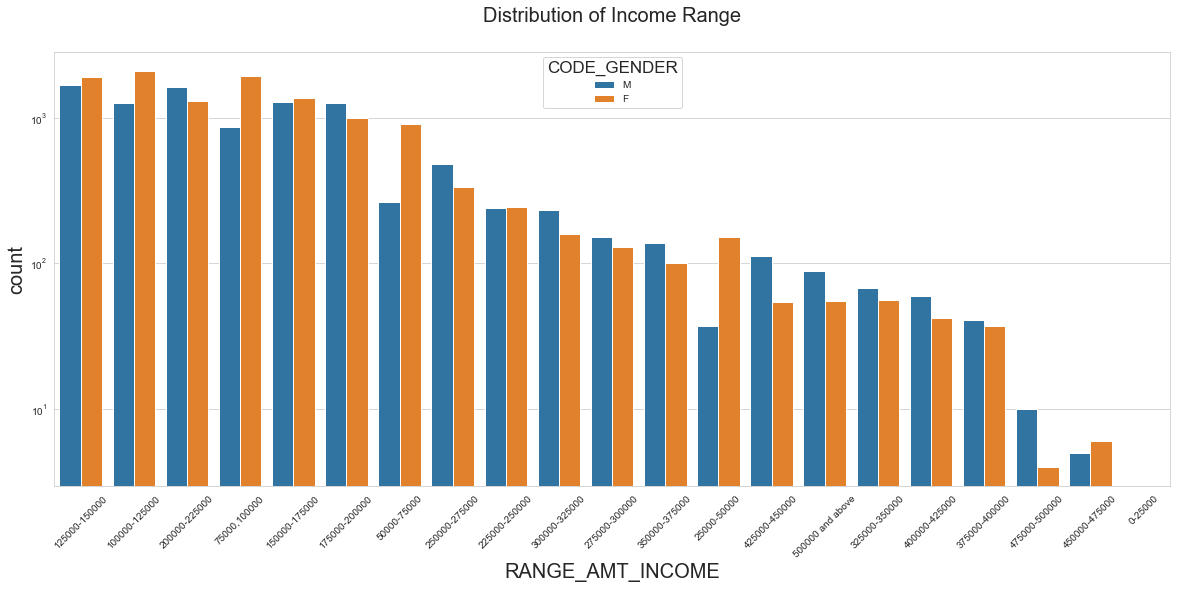

In [44]:
# PLotting for income range
plt.figure(figsize=(20,8))
sns.set_style('whitegrid')
plt.title("Distribution of Income Range")
sns.countplot(x="RANGE_AMT_INCOME",data=df_target_1,hue='CODE_GENDER',order=df_target_1['RANGE_AMT_INCOME'].value_counts().index)
plt.yscale('log')
plt.xticks(rotation=45)

### Inferences from the graph:

1) Female counts are greater than male counts for most of the income ranges.<br>
2) Income range from 100000 to 225000  is having more number of credits.<br>
3) From the graph we can infer that majority of the females have higher credits than the males for      the respective ranges.<br>
4) No income count for income range less than 25000 .<br>
5) Less count for income range 40000 and below.

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

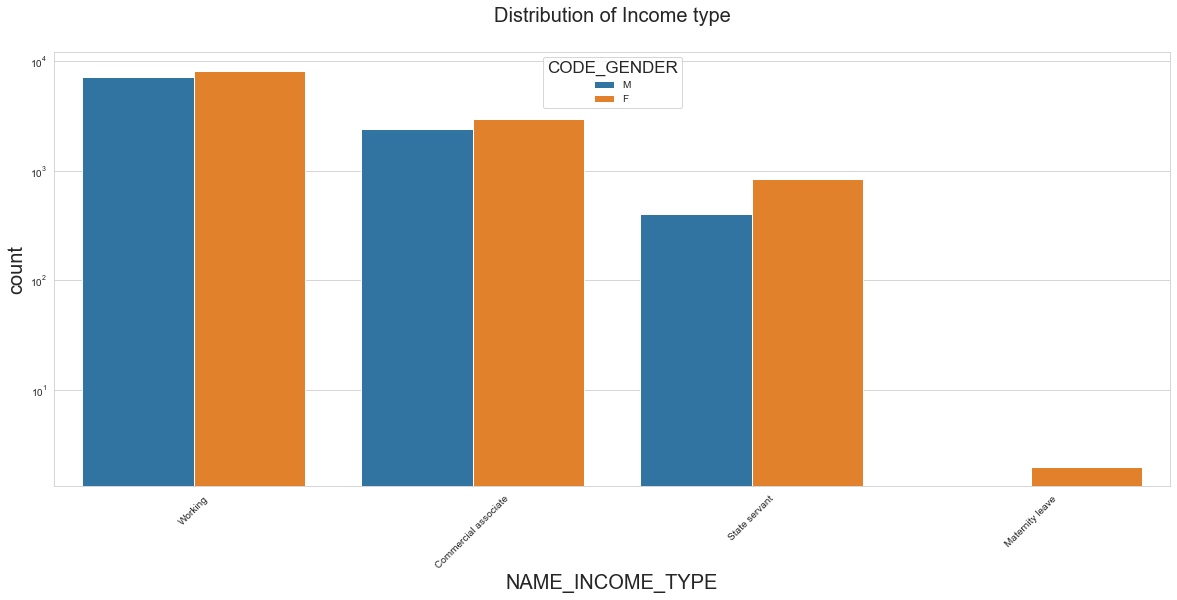

In [45]:
# Plotting for Income type
sns.set_style('whitegrid')
plt.figure(figsize=(20,8))
plt.title("Distribution of Income type")
sns.countplot(x="NAME_INCOME_TYPE",data=df_target_1,hue='CODE_GENDER',order=df_target_1['NAME_INCOME_TYPE'].value_counts().index)
plt.yscale('log')
plt.xticks(rotation=45)

#### Inferences from the above graph:

1)For income type ‘working’, ’commercial associate’, and ‘State Servant’ the number of credits are higher than other i.e. ‘Maternity leave.

2)For income type ‘working’, ’commercial associate’, and ‘State Servant’, the Females are having more number of credits than male.

3)For income type ‘Maternity leave’,there are less number of credits.


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

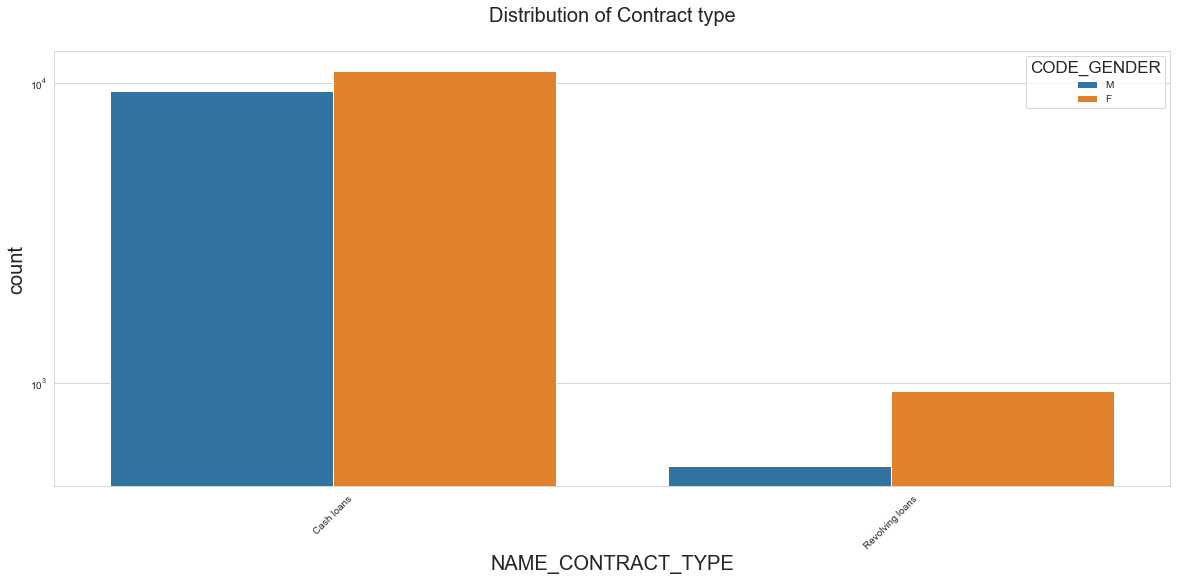

In [46]:
# Plotting for Contract type
plt.figure(figsize=(20,8))
sns.set_style('whitegrid')
plt.title("Distribution of Contract type")
sns.countplot(x="NAME_CONTRACT_TYPE",data=df_target_1,hue='CODE_GENDER',order=df_target_1['NAME_CONTRACT_TYPE'].value_counts().index)
plt.yscale('log')
plt.xticks(rotation=45)

#### Inferences from the above graph:

1)Contract type ‘cash loans’ is having higher number of credits than ‘Revolving loans’ contract type.

2)Number of females applying for credits are more than males.


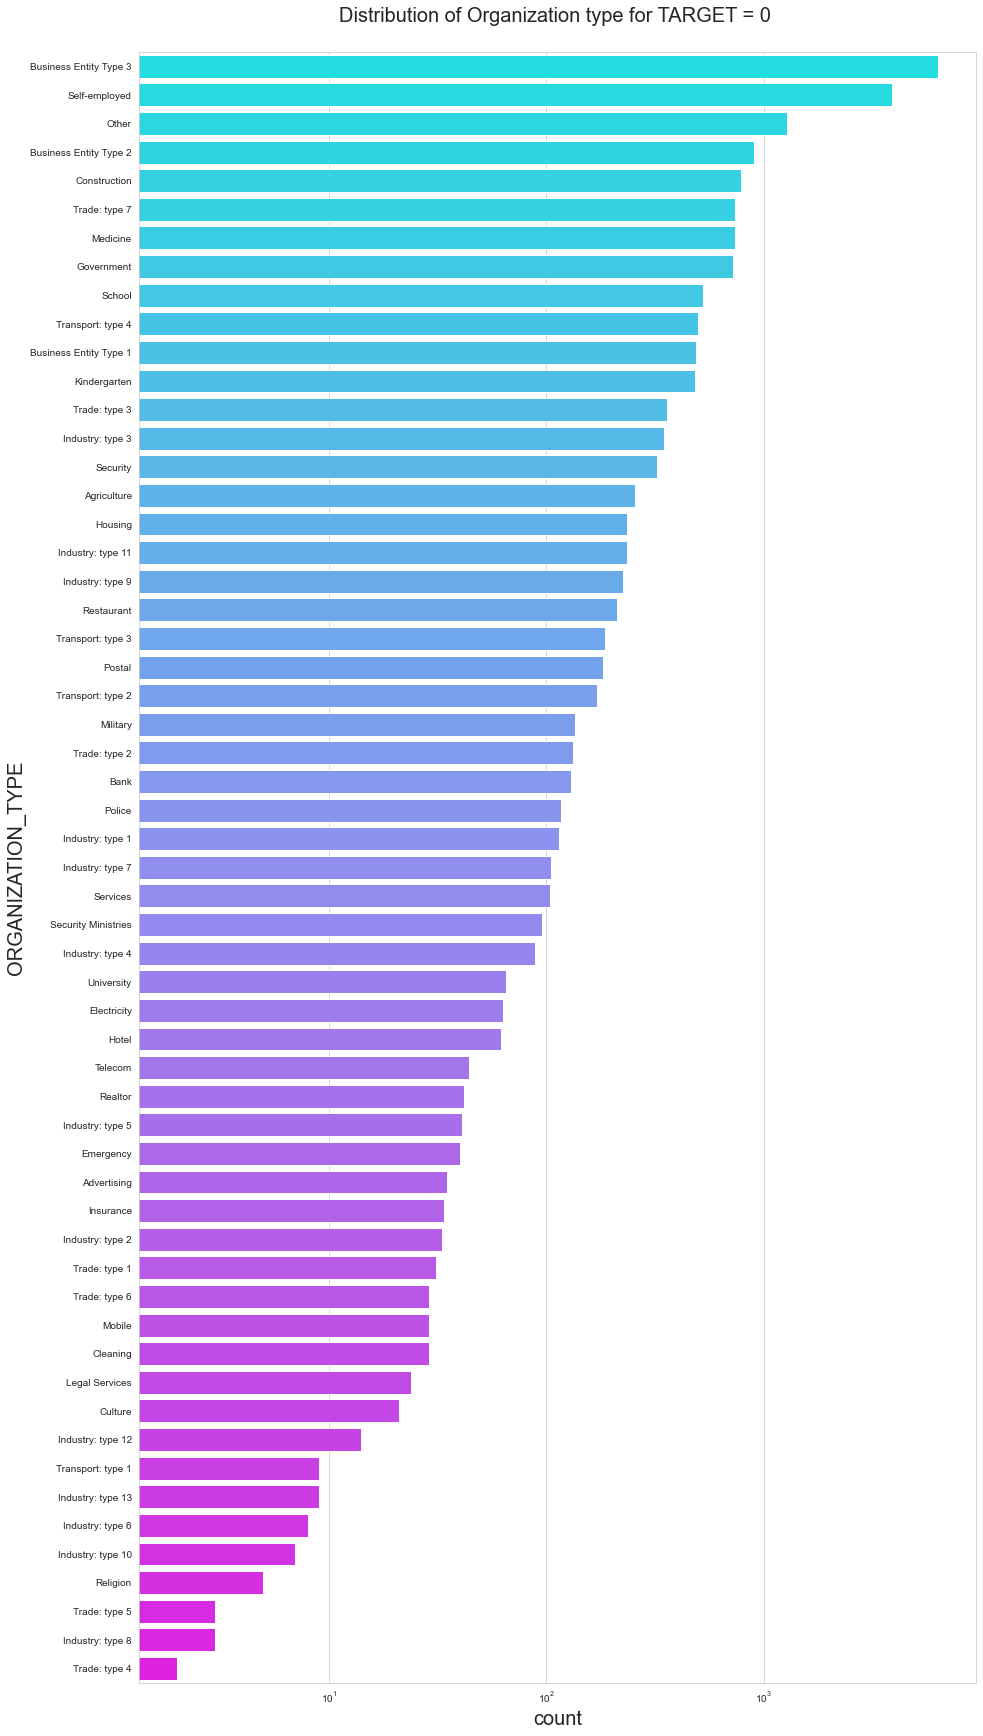

In [47]:
# Plotting for Organization type 
plt.figure(figsize=(15,30))
sns.set_style('whitegrid')
plt.rcParams['axes.titlepad'] = 30
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 20
plt.title("Distribution of Organization type for TARGET = 0 ")
sns.countplot(y="ORGANIZATION_TYPE",data=df_target_1,order=df_target_1['ORGANIZATION_TYPE'].value_counts().index,palette='cool')
plt.xscale('log')


#### Inferences from the above graph:

1)Clients which have applied for credits are mosty from the organization type ‘Business entity Type 3’ , ‘Self employed’ , ‘Other’ , ‘Medicine’, ‘Government’ and ‘Business Entity Type 2’.

2)Less clients have applied for credits from Industry type 8,type 13 , type 10, type 6, religion and  trade type 5, type 4.


### Finding correlations between  the columns:

#### For Target 0

In [48]:
# Finding correlation for  columns in target 0

target0_corr=df_target_0.iloc[0:,2:]

corr = target0_corr.corr()

corr = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corrdf0 = corr.unstack().reset_index()
corrdf0.columns = ['VAR1', 'VAR2', 'Correlation']
corrdf0.dropna(subset = ['Correlation'], inplace = True)
corrdf0['Correlation'] = round(corrdf0['Correlation'], 2)
# Since we see correlation as an absolute value, we are converting it into absolute value
corrdf0['Correlation_abs'] = corrdf0['Correlation'].abs()
corrdf0=corrdf0.sort_values(by = 'Correlation_abs', ascending = False).head(10)
corrdf0


,VAR1,VAR2,Correlation,Correlation_abs
62,AMT_GOODS_PRICE,AMT_CREDIT,0.99,0.99
223,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.82,0.82
63,AMT_GOODS_PRICE,AMT_ANNUITY,0.77,0.77
47,AMT_ANNUITY,AMT_CREDIT,0.76,0.76
207,REG_CITY_NOT_WORK_CITY,REG_CITY_NOT_LIVE_CITY,0.44,0.44
46,AMT_ANNUITY,AMT_INCOME_TOTAL,0.40,0.40
111,DAYS_EMPLOYED,DAYS_BIRTH,0.35,0.35
61,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.33,0.33
31,AMT_CREDIT,AMT_INCOME_TOTAL,0.33,0.33
126,DAYS_REGISTRATION,DAYS_BIRTH,0.30,0.30


### Finding Correlation between columns for Target 1

In [49]:
# Finding correlation for  columns in target 1

corr = df_target_1.corr()

corr = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corrdf1 = corr.unstack().reset_index()
corrdf1.columns = ['VAR1', 'VAR2', 'Correlation']
corrdf1.dropna(subset = ['Correlation'], inplace = True)
corrdf1['Correlation'] = round(corrdf1['Correlation'], 2)
# Since we see correlation as an absolute value, we are converting it into absolute value
corrdf1['Correlation_abs'] = corrdf1['Correlation'].abs()
corrdf1=corrdf1.sort_values(by = 'Correlation_abs', ascending = False).head(10)
corrdf1

,VAR1,VAR2,Correlation,Correlation_abs
106,AMT_GOODS_PRICE,AMT_CREDIT,0.98,0.98
287,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.77,0.77
89,AMT_ANNUITY,AMT_CREDIT,0.75,0.75
107,AMT_GOODS_PRICE,AMT_ANNUITY,0.75,0.75
269,REG_CITY_NOT_WORK_CITY,REG_CITY_NOT_LIVE_CITY,0.48,0.48
161,DAYS_EMPLOYED,DAYS_BIRTH,0.31,0.31
178,DAYS_REGISTRATION,DAYS_BIRTH,0.24,0.24
285,LIVE_CITY_NOT_WORK_CITY,LIVE_REGION_NOT_WORK_REGION,0.23,0.23
142,DAYS_BIRTH,AMT_GOODS_PRICE,0.19,0.19
140,DAYS_BIRTH,AMT_CREDIT,0.19,0.19


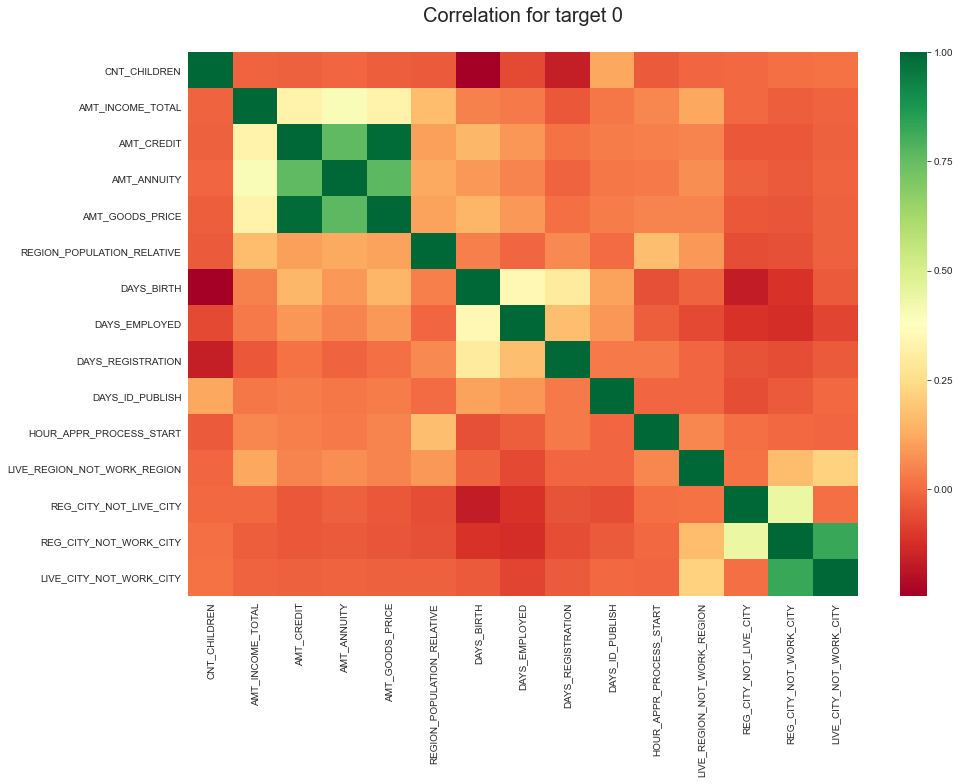

In [50]:
# Creating a HeatMAp for target 0

corr0= df_target_0.iloc[0:,2:].corr()

plt.figure(figsize=(15, 10))
plt.title('Correlation for target 0')
sns.heatmap(corr0,annot=False,cmap="RdYlGn")

#### Inferences from the above Heatmap(for Target 0):

1)Credit amount directly proportional to the date of birth, which means Credit amount is lower for lower age and vice-versa.

2)Credit amount is inversely proportional to the number of children the client has ,which means Credit amount is higher for the client having less children and vice-versa.

3)Income amount is inversely proportional to the number of children the client has ,which the client having less children have more income amount and vice-versa.

4)Count of children the client has is inversely proportional to the population of the region which means client having less children are from dense populated area. 

5)Credit amount is directly proportional to the population of the region which means credit amount is higher in densely populated area. 

6)Income amount is directly proportional to the population of the region which means income amount is higher in densely populated area. 


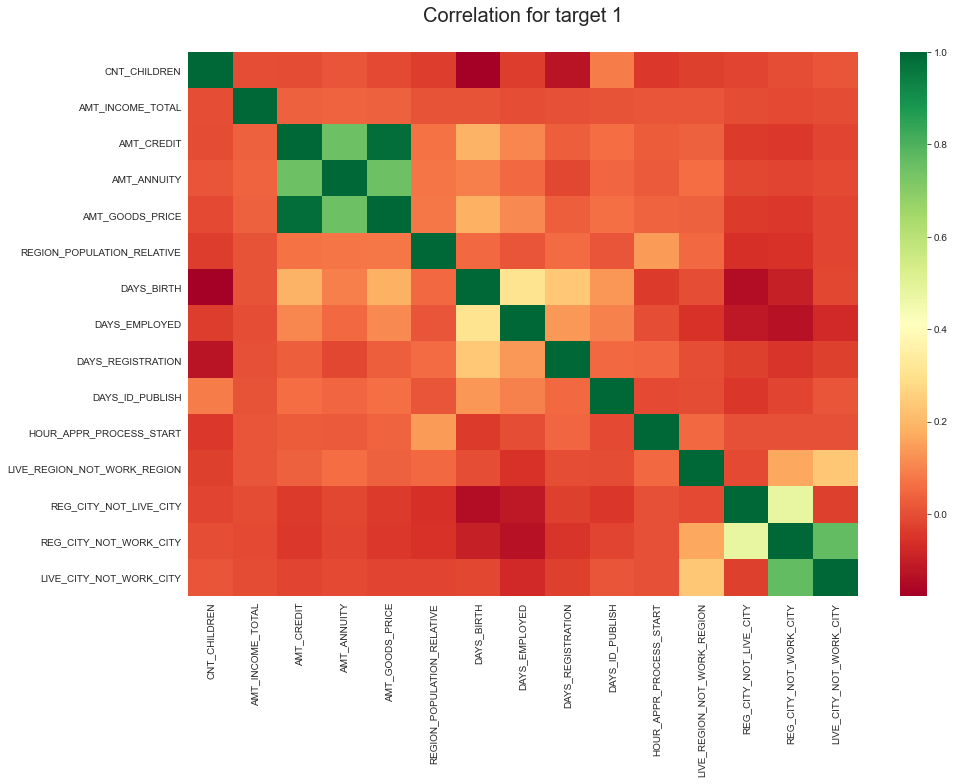

In [51]:
# Creating a HeatMAp for target 1

corr1= df_target_1.iloc[0:,2:].corr()

plt.figure(figsize=(15, 10))
plt.title('Correlation for target 1')
sns.heatmap(corr1,annot=False,cmap="RdYlGn")

#### Inferences from the above Heatmap(for Target 1): 

From the Correlation heatmap for Target 0 , we see 
that  most of the inferences are same for Target 1 
also.
Few of the different points are as follows: 

1. The client's permanent address does not match contact 
 address are having less children and vice-versa

2. The client's permanent address does not match work address 
are having less children and vice-versa

3. The client's contact address does not match work address are having less children and vice-versa!

#### Univariate Analysis for Finding out if Outliers present 

#### For TARGET = 0

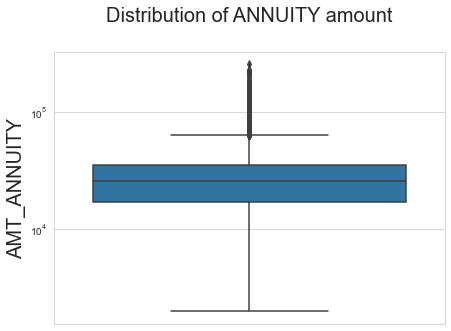

In [52]:
# Boxplot for AMT_ANNUITY amount
plt.figure(figsize=(7, 5))
plt.title('Distribution of ANNUITY amount')
sns.boxplot(data =df_target_0, x= "AMT_ANNUITY",orient='v')
plt.yscale('log')
plt.show()

#### Inferences from the above graph:

1)Some outliers are noticed in annuity amount.

2)The first quartile is bigger than third quartile for annuity amount which means most of the annuity clients are from first quartile.


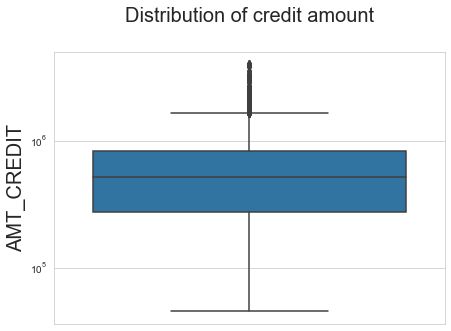

In [53]:
# Boxplot for credit amount
plt.figure(figsize=(7, 5))
plt.title('Distribution of credit amount')
sns.boxplot(data =df_target_0, x= "AMT_CREDIT",orient='v')
plt.yscale('log')
plt.show()

#### Inferences from the above graph:

1) Some outliers are noticed in credit amount.

2) The first quartile is bigger than third quartile for credit amount which means most of the credits    of clients are present in the first quartile


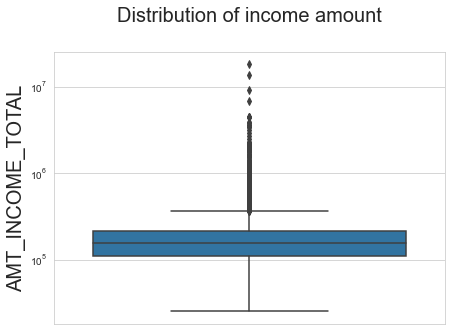

In [54]:
# Boxplot for income amount
plt.figure(figsize=(7, 5))
plt.title('Distribution of income amount')
sns.boxplot(data =df_target_0, x= "AMT_INCOME_TOTAL",orient='v')
plt.yscale('log')
plt.show()

#### Inferences from the above graph:

1) Some outliers are noticed in income amount
 
2) The third quartiles is very small for income amount.



#### Univariate Analysis for Finding out if Outliers present 

#### For TARGET = 1

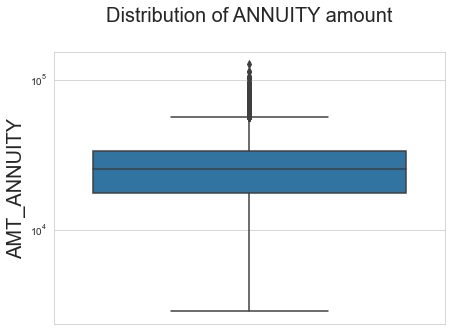

In [55]:
# Boxplot for AMT_ANNUITY amount
plt.figure(figsize=(7, 5))
plt.title('Distribution of ANNUITY amount')
sns.boxplot(data =df_target_1, x= "AMT_ANNUITY",orient='v')
plt.yscale('log')
plt.show()

#### Inferences from the above graph:

1) Some outliers are noticed in annuity amount.

2) The first quartile is bigger than third quartile for annuity amount which means most of the          annuity clients are from first quartile.


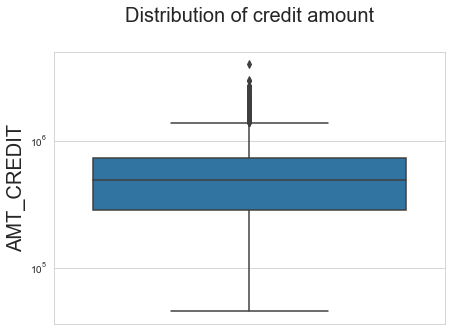

In [56]:
# Boxplot for credit amount
plt.figure(figsize=(7, 5))
plt.title('Distribution of credit amount')
sns.boxplot(data =df_target_1, x= "AMT_CREDIT",orient='v')
plt.yscale('log')
plt.show()

#### Inferences from the above graph:

1) Some outliers are noticed in credit amount.

2) The first quartile is bigger than third quartile for credit amount which means most of the credits of clients are present in the first quartile.

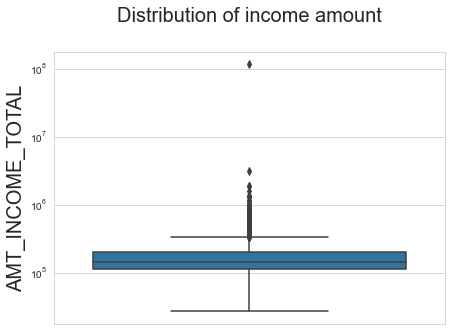

In [57]:
# Boxplot for income amount
plt.figure(figsize=(7, 5))
plt.title('Distribution of income amount')
sns.boxplot(data =df_target_1, x= "AMT_INCOME_TOTAL",orient='v')
plt.yscale('log')
plt.show()

#### Inferences from the above graph:

1)The third quartiles is very small for income amount.

2)Some outliers are noticed in income amount.

3)Most of the clients of income are present in first quartile.


#### Bivariate Ananlysis

#### For Target = 0

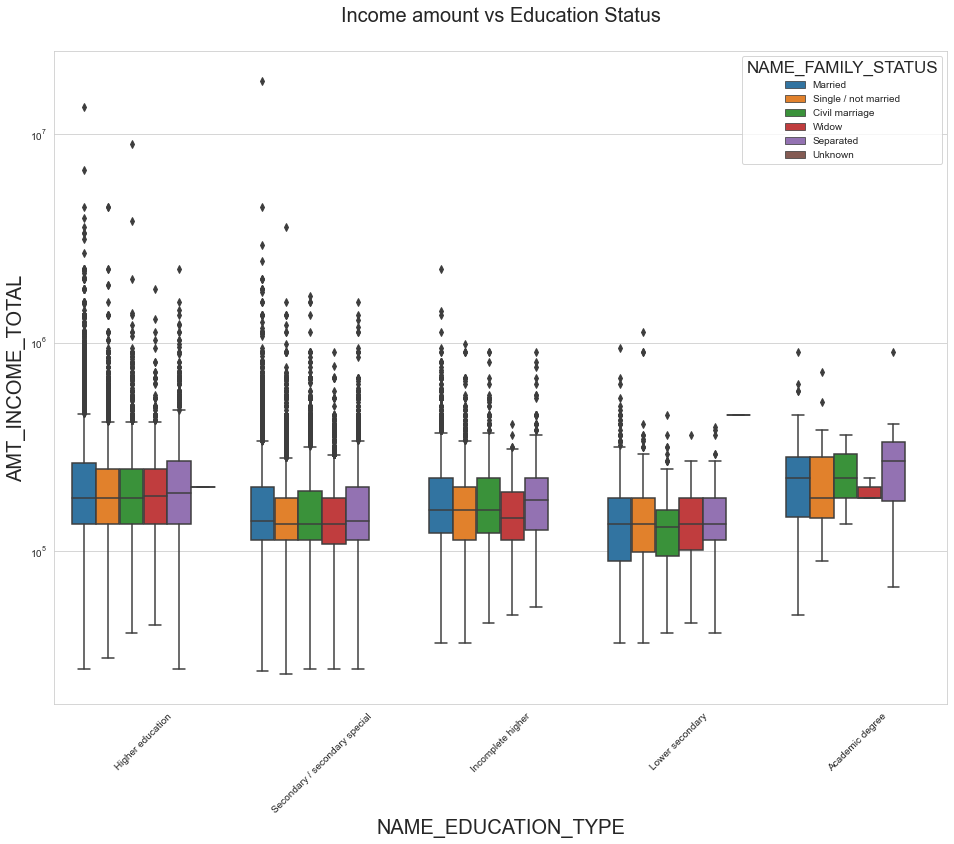

In [58]:
# Box plotting for Income amount in logarithmic scale

plt.figure(figsize=(16,12))
plt.title('Income amount vs Education Status')
sns.boxplot(data =df_target_0, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.yscale('log')
plt.xticks(rotation=45)
plt.show()

#### Inferences from the above graph:

1)For Education type 'Higher education' the income amount mean is mostly equal with family status. It contains many outliers.

2)For Education type ‘ Academic degree’ , there are less outliers but they are having the income amount little higher that the Higher education.

3)Education type ‘Lower secondary’ of family status ‘civil marriage’ are having less income amount than the others.



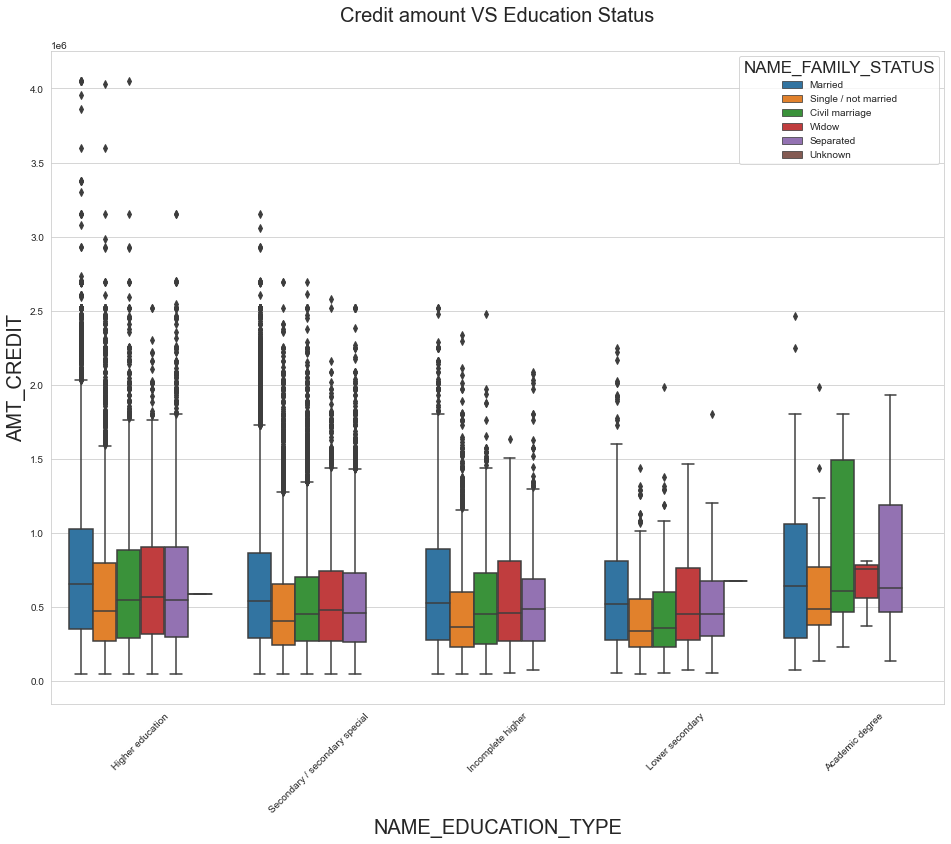

In [59]:
# Box plot for Credit amount

plt.figure(figsize=(16,12))
plt.title('Credit amount VS Education Status')
sns.boxplot(data =df_target_0, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.xticks(rotation=45)
plt.show()

#### Inferences from the above graph:

1)For Education type 'Higher education' the credit amount mean is different for the different family statuses.It is lowest for single/unmarried people and highest for married people.  It contains many outliers.

2)For Education type ‘ Academic degree’ , there are less outliers but they are having the credit amount little higher that the Higher education.

3)Education type ‘Lower secondary’ of family status ‘single/unmarried’ are having less credit amount than the others.



#### Bivariate Ananlysis

#### For Target = 1

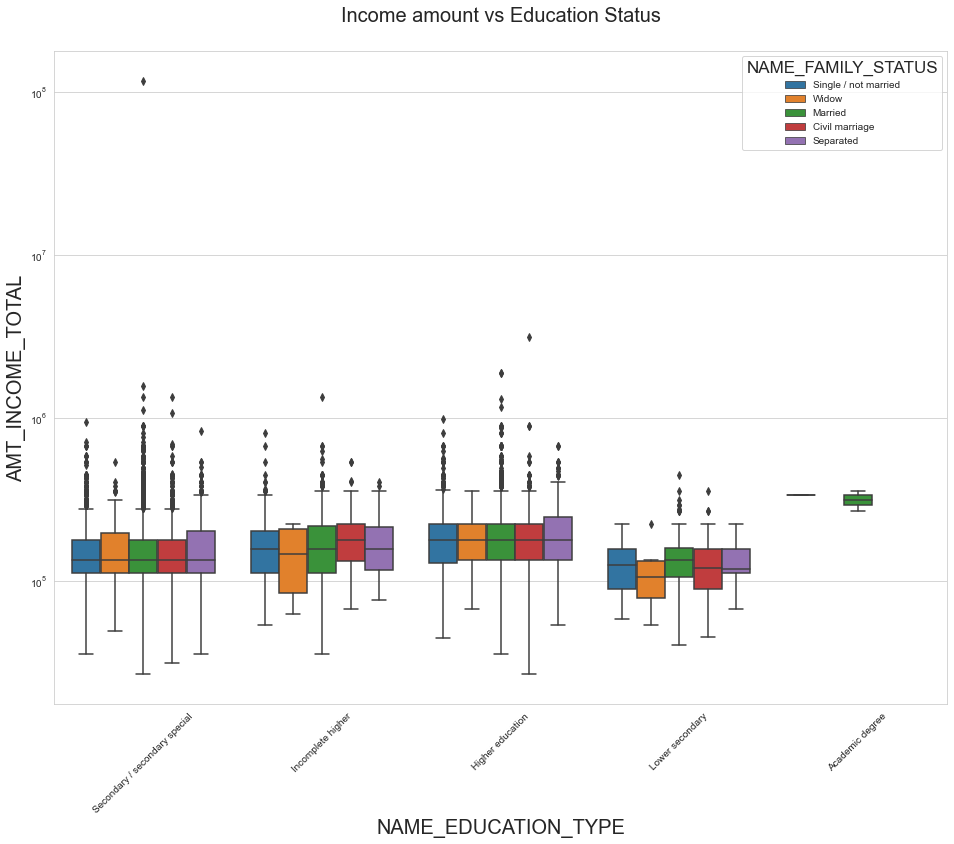

In [60]:
# Box plotting for Income amount in logarithmic scale

plt.figure(figsize=(16,12))
plt.title('Income amount vs Education Status')
sns.boxplot(data =df_target_1, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.yscale('log')
plt.xticks(rotation=45)
plt.show()

#### Inferences from the graph:

1)For Education type 'Higher education' the income amount is mostly equal among all the family statuses. 

2)For Academic degree there are very less outliers and there income amount is little higher that Higher education.

3)The Education type 'Lower secondary'  have less income amount than the others.

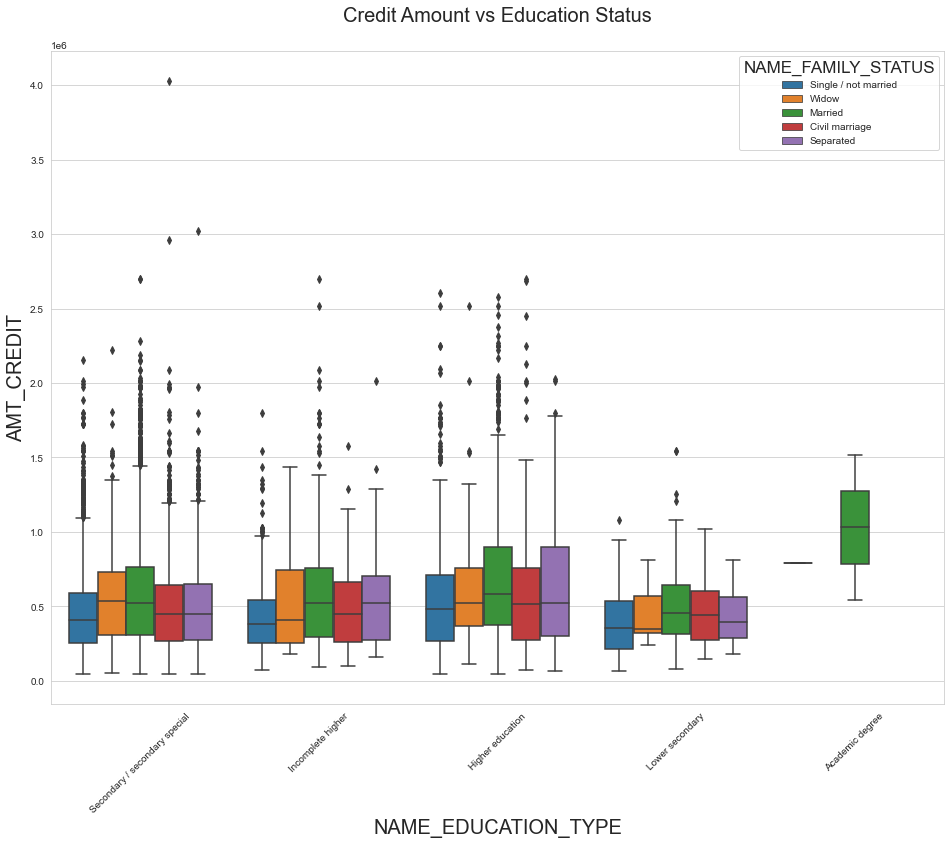

In [61]:
# Box plot for credit amount

plt.figure(figsize=(16,12))
sns.boxplot(data =df_target_1, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit Amount vs Education Status')
plt.xticks(rotation=45)
plt.show()

#### Inferences from the graph:

1)In the Education type ‘Academic degree’ the family status as ‘married’ people are having higher credit amount as compared to other family status people and also to the other education type people.

2)In the Education type ‘Higher education’ , the family status of ‘Married’ is having higher  credit amount than the other family statuses.  

3)Very less outliers present in the education type ‘Lower Secondary’.

4)The family statuses ‘Widow’ and ‘Separated ’ are having very less outliers for the education type ‘Higher education’. 



### Reading the previous application dataset.

In [62]:
#read the data set of "previous application" in prev_df.
prev_df=pd.read_csv("./previous_application.csv")

In [63]:
prev_df.shape

(1670214, 37)

In [64]:
# Checking for null percentages inside the columns
miss_data_prev = prev_df.isnull().sum()/len(prev_df.index)*100
miss_data_prev

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [65]:
# Finding the number of columns which have missing values percentage greater than or equal to 30%.
miss_data_prev=miss_data_prev[miss_data_prev.values>=30]
miss_data_prev.count()

11

In [66]:
# Removing these 11 columns

list_null_cols=list(miss_data_prev[miss_data_prev.values>=30].index) 
# len(list_null_cols)
prev_df.drop(labels=list_null_cols,axis=1,inplace=True)
prev_df.shape

(1670214, 26)

In [67]:
# Inspecting the column NAME_CASH_LOAN_PURPOSE
prev_df['NAME_CASH_LOAN_PURPOSE'].value_counts() 

XAP                                 922661
XNA                                 677918
Repairs                              23765
Other                                15608
Urgent needs                          8412
Buying a used car                     2888
Building a house or an annex          2693
Everyday expenses                     2416
Medicine                              2174
Payments on other loans               1931
Education                             1573
Journey                               1239
Purchase of electronic equipment      1061
Buying a new car                      1012
Wedding / gift / holiday               962
Buying a home                          865
Car repairs                            797
Furniture                              749
Buying a holiday home / land           533
Business development                   426
Gasification / water supply            300
Buying a garage                        136
Hobby                                   55
Money for a

We see that there are values like 'XAP' and 'XNA' which are not needed , therefore we will remove them.

In [68]:
# Removing the rows which have 'XNA' and 'XAP' in their columns
prev_df=prev_df.drop(prev_df[prev_df['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
prev_df=prev_df.drop(prev_df[prev_df['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)


In [69]:
# Checking the shape after removing :
prev_df.shape

(69635, 26)

### Merging the two datasets : Application dataset and Previous Application dataset

In [70]:
merge_df =pd.merge(left=application_df,right=prev_df,how='inner',on='SK_ID_CURR')

In [71]:
merge_df.shape

(51420, 55)

In [72]:
# Renaming the columns of the merged dataframe

merge_df = merge_df.rename({'NAME_CONTRACT_TYPE_x' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_x':'AMT_CREDIT','AMT_ANNUITY_x':'AMT_ANNUITY',
                         'AMT_GOODS_PRICE_x':'AMT_GOODS_PRICE', 'WEEKDAY_APPR_PROCESS_START_x' : 'WEEKDAY_APPR_PROCESS_START',
                         'HOUR_APPR_PROCESS_START_x':'HOUR_APPR_PROCESS_START',
                         'NAME_CONTRACT_TYPE_y':'NAME_CONTRACT_TYPE_PREV','AMT_CREDIT_y':'AMT_CREDIT_PREV',
                         'AMT_CREDITx':'AMT_CREDIT_PREV','AMT_ANNUITY_y':'AMT_ANNUITY_PREV','AMT_GOODS_PRICE_y':'AMT_GOODS_PRICE_PREV',
                         'WEEKDAY_APPR_PROCESS_START_y':'WEEKDAY_APPR_PROCESS_START_PREV',
                         'HOUR_APPR_PROCESS_START_y':'HOUR_APPR_PROCESS_START_PREV'}, axis=1)

#### Since we have many columns which are not necessary for our analysis , we will drop those columns.

In [73]:
# Dropping columns not needed

merge_df.drop(['SK_ID_CURR','WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 
              'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
              'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY','WEEKDAY_APPR_PROCESS_START_PREV',
              'HOUR_APPR_PROCESS_START_PREV', 'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY'],axis=1,inplace=True)

In [74]:
merge_df.shape

(51420, 44)

### Univariate Analysis for the merged dataset.

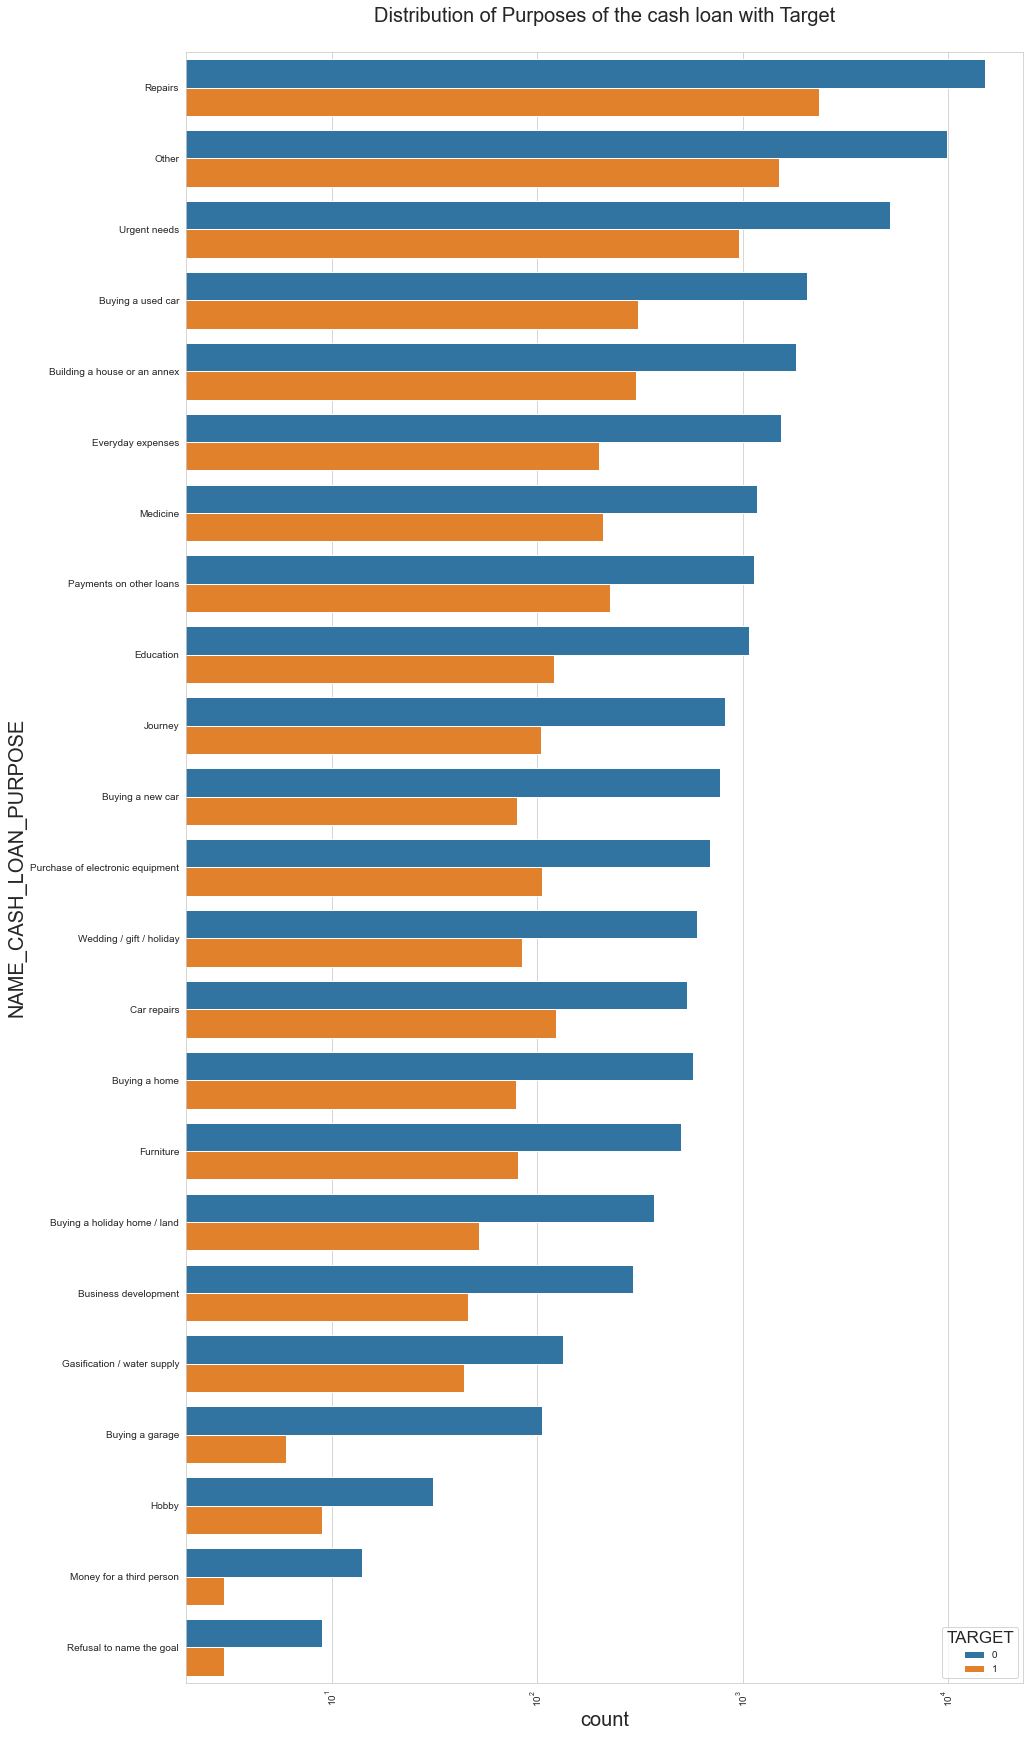

In [75]:
# Plotting for Distribution of Purposes of the cash loan with Target

sns.set_style('whitegrid')
plt.figure(figsize=(15,30))
plt.title('Distribution of Purposes of the cash loan with Target')
sns.countplot(data = merge_df, y= 'NAME_CASH_LOAN_PURPOSE', 
            order=merge_df['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET')
plt.xticks(rotation=90)
plt.xscale('log')                  

#### Inferences from the above graph:

1)Loan purposes with 'Repairs' are facing more difficulites in payment on time.

2)The cash loan purposes for 'Buying a garage', 'Business development', 'Buying land','Buying a new car' and 'Education' , loan payment is significant higher than facing difficulties.Hence we can focus on these purposes since the client is having less payment difficulties for these purposes.


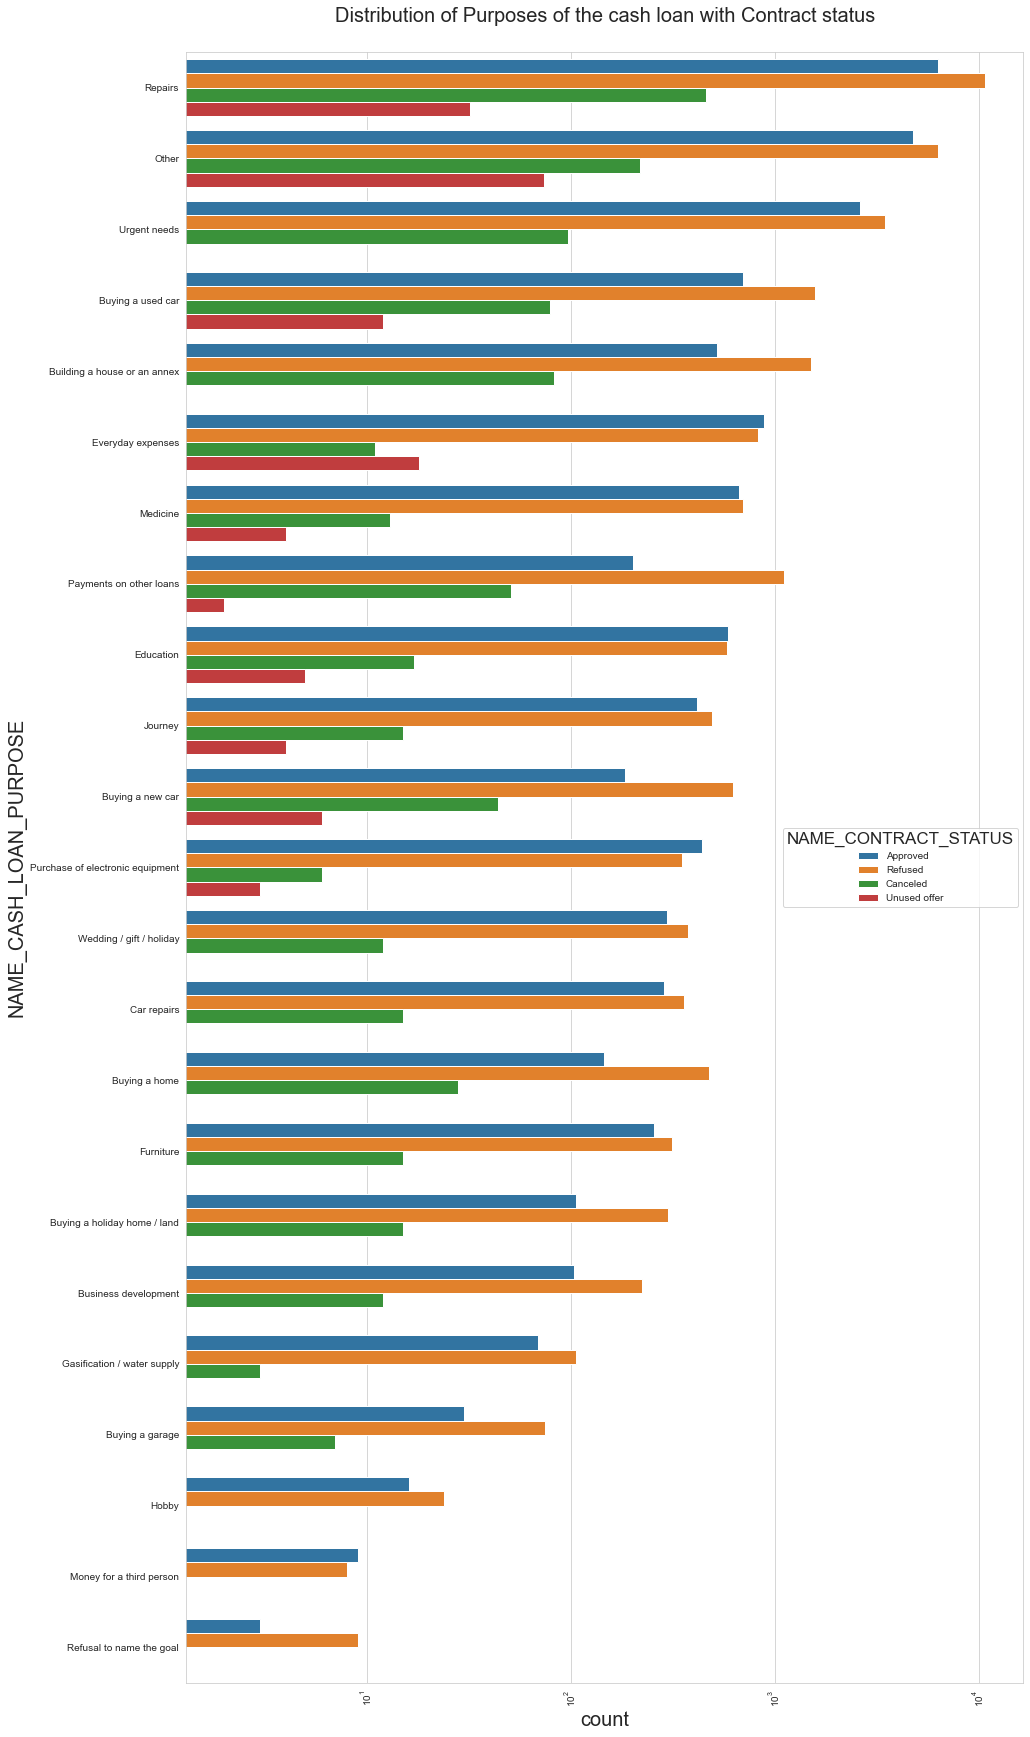

In [76]:
# Plotting for Distribution of Purposes of the cash loan with Contract status

sns.set_style('whitegrid')
plt.figure(figsize=(15,30))
plt.title('Distribution of Purposes of the cash loan with Contract status')
sns.countplot(data = merge_df, y= 'NAME_CASH_LOAN_PURPOSE', 
            order=merge_df['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS')
plt.xticks(rotation=90)
plt.xscale('log')                  

#### Inferences from the above graph:

1)The loan purpose 'Repairs' is having the most number of rejections.

2)For education purposes we have equal number of approves and rejection.

3)Paying other loans and buying a new car is having significant higher rejection than approves.

In [77]:
merge_df.columns

Index(['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'ORGANIZATION_TYPE',
       'RANGE_AMT_CREDIT', 'RANGE_AMT_INCOME', 'SK_ID_PREV',
       'NAME_CONTRACT_TYPE_PREV', 'AMT_ANNUITY_PREV', 'AMT_APPLICATION',
       'AMT_CREDIT_PREV', 'AMT_GOODS_PRICE_PREV', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY',
       'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE',
       'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT',
       'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

### Bivariate Anaysis for the Merged dataset.

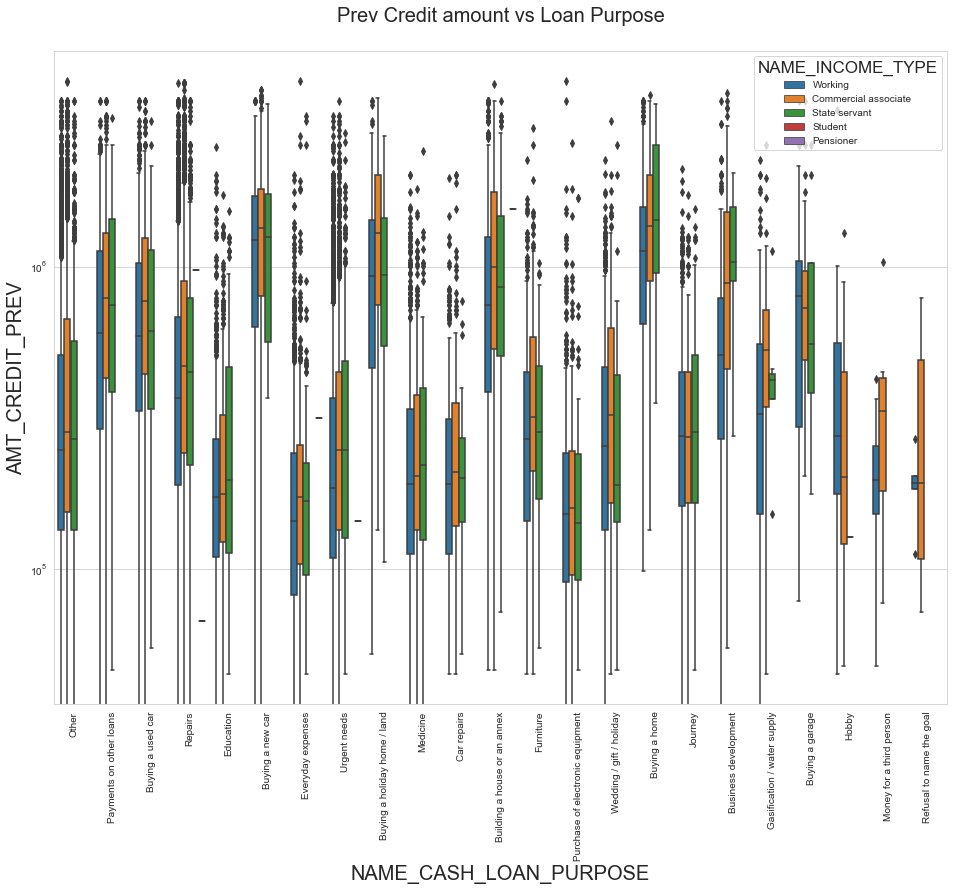

In [78]:
# Box plott for Previous Credit amount Vs Loan Purpose

plt.figure(figsize=(16,12))
plt.title('Prev Credit amount vs Loan Purpose')
sns.boxplot(data =merge_df, x='NAME_CASH_LOAN_PURPOSE',y='AMT_CREDIT_PREV',hue='NAME_INCOME_TYPE',orient='v')
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()

#### Inferences from the above graph:

1)Loan purposes like 'Buying a home','Buying a land','Buying a new car' and'Building a house' have high number of credits.

2)Income type of  working have  less amount of credit applied.

3)Less number of credits have been applied for the cash loan purposes like Money for third person , a Hobby ,everyday expenses, purchase of electronic equipment.

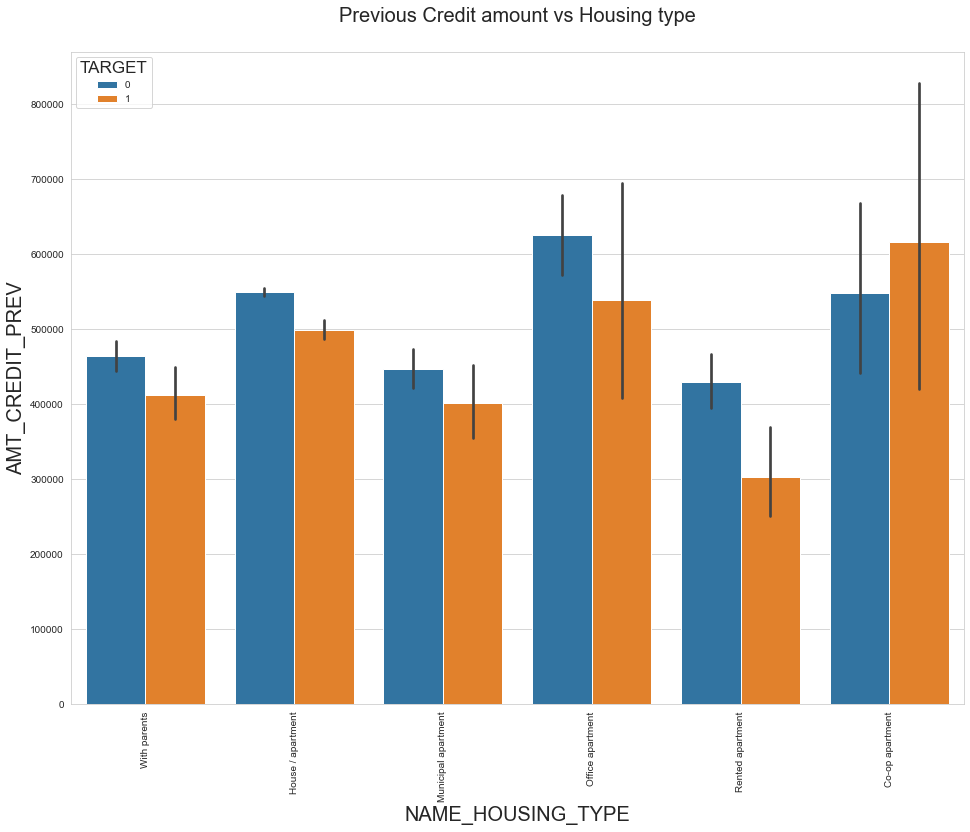

In [79]:
# Box plot for Previous Credit amount  vs Housing type 

plt.figure(figsize=(16,12))
plt.title('Previous Credit amount vs Housing type')
sns.barplot(data =merge_df,x='NAME_HOUSING_TYPE', y='AMT_CREDIT_PREV',hue='TARGET')
plt.xticks(rotation=90)
plt.show()

#### Inferences from the above graph:

1)For the Housing type, office appartment is having higher credit for target 0. 

2)For the Housing type,co-op apartment is having higher credit for target 1. 

3)We can conclude that bank should avoid giving loans to the housing type of co-op apartment as they are having difficulties in payment. 

4)Bank can focus mostly on housing type with parents or House/apartment or municipal appartment for successful payments of credits.

## Conclusions from the Case Study:

1)Bank can focus mostly on housing type with parents or House/apartment or municipal appartment for successful payments of credits as they are having less number of unsuccessful payments.

2)Banks should focus less on income type ‘Working’ as they are having less number of credits applied and most number of unsuccessful payments.

3)Banks should focus less on the loan purpose 'Repairs' as it is having the most number of rejections.

4)Bank should avoid giving loans to the housing type of co-op apartment as they are having difficulties in payment. 

5)Banks should focus more on contract type ‘Student’ ,’pensioner’ and ‘Businessman’ with housing type other than ‘Co-op apartment’ since they result in more number of successful payments.

